In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from IPython.display import Image
%matplotlib inline

In [2]:
dataF = data = pd.read_csv('train.csv')

In [3]:
dataF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
age = data['Age']
sum(age.isnull())

177

In [5]:
cabinName = data['Cabin']
sum(cabinName.isnull())

687

In [6]:
port = data['Embarked']
sum(port.isnull())

2

In [8]:
dataF.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dataCopyMale = dataF[dataF['Sex'] == 'male']
dataCopyFemale = dataF[dataF['Sex'] == 'female']
dataCopyMale["Age"] = dataCopyMale["Age"].fillna(dataCopyMale["Age"].mean())
dataCopyFemale["Age"] = dataCopyFemale["Age"].fillna(dataCopyFemale["Age"].mean())
frames = [dataCopyMale, dataCopyFemale]
dataCopyAge = pd.concat(frames)
dataCopyAge.sort_index()

/Users/rubenmarcos/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/rubenmarcos/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [19]:
#del dataCopyAge['Name']
#del dataCopyAge['Ticket']
#del dataCopyAge['Cabin']
#Como sabemos que solamente hay dos nan en el dataset, podemos hacer un drop
dataCopyAge = dataCopyAge.dropna()

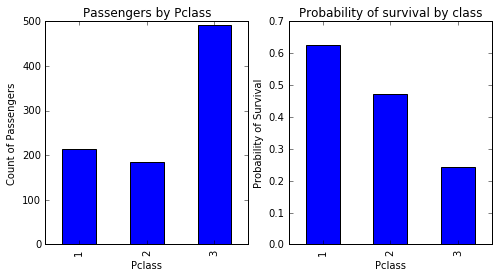

In [20]:
#Agrupamos el conteo de sobrevivencia
temp1 = dataCopyAge.groupby('Pclass').Survived.count()
temp2 = dataCopyAge.groupby('Pclass').Survived.sum()/dataCopyAge.groupby('Pclass').Survived.count()
fig = plt.figure(figsize=(8,4))
#Agregamos el grafico usando matplotlib, desde pandas.
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Pclass")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by class")

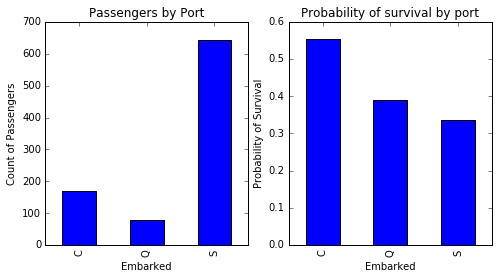

In [21]:
#Agrupamos el conteo de sobrevivencia
temp1 = dataCopyAge.groupby('Embarked').Survived.count()
temp2 = dataCopyAge.groupby('Embarked').Survived.sum()/dataCopyAge.groupby('Embarked').Survived.count()
fig = plt.figure(figsize=(8,4))
#Agregamos el grafico usando matplotlib, desde pandas.
ax1 = fig.add_subplot(121)
ax1.set_xlabel('A')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Port")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Embarked')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by port")

In [22]:
pd.crosstab([dataCopyAge.Pclass, dataCopyAge.Sex], dataCopyAge.Survived.astype(bool))

Survived       False  True 
Pclass Sex                 
1      female      3     89
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      300     47

In [23]:
#Como sklearn solamente acepta datos numéricos, hay que convertir las columnas sex y port en 
#datos númericos
#Código tomado de otra Kaggle submission en http://nbviewer.jupyter.org/github/savarin/pyconuk-introtutorial/blob/master/notebooks/Section%201-0%20-%20First%20Cut.ipynb

In [24]:
dataCopyAge['Gender'] = dataCopyAge['Sex'].map({'female': 0, 'male':1}).astype(int)
dataCopyAge['Port'] = dataCopyAge['Embarked'].map({'C':1, 'S':2, 'Q':3}).astype(int)
dataCopyAge.describe()

/Users/rubenmarcos/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/rubenmarcos/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Port
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.690446,0.524184,0.382452,32.096681,0.649044,1.897638
std,256.998173,0.486260,0.834700,12.981441,1.103705,0.806761,49.697504,0.477538,0.515181
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,2.000000
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,1.000000,2.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000


In [25]:
#Ahora procedemos a eliminar los únicos variables no númericos restantes
del dataCopyAge['Sex']
del dataCopyAge['Embarked']

In [26]:
dataCopyAge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 888
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Gender         889 non-null int64
Port           889 non-null int64
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [27]:
#Ahora que todo es númerico, lo convertimos en un array para poder manipuar la info
titanic_numbers = dataCopyAge.values
titanic_numbers

array([[   1.    ,    0.    ,    3.    , ...,    7.25  ,    1.    ,    2.    ],
       [   5.    ,    0.    ,    3.    , ...,    8.05  ,    1.    ,    2.    ],
       [   6.    ,    0.    ,    3.    , ...,    8.4583,    1.    ,    3.    ],
       ..., 
       [ 886.    ,    0.    ,    3.    , ...,   29.125 ,    0.    ,    3.    ],
       [ 888.    ,    1.    ,    1.    , ...,   30.    ,    0.    ,    2.    ],
       [ 889.    ,    0.    ,    3.    , ...,   23.45  ,    0.    ,    2.    ]])

In [28]:
#Primero vamos a eliminar variables con baja varianza
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(titanic_numbers)

array([[   1.    ,    0.    ,    3.    , ...,    7.25  ,    1.    ,    2.    ],
       [   5.    ,    0.    ,    3.    , ...,    8.05  ,    1.    ,    2.    ],
       [   6.    ,    0.    ,    3.    , ...,    8.4583,    1.    ,    3.    ],
       ..., 
       [ 886.    ,    0.    ,    3.    , ...,   29.125 ,    0.    ,    3.    ],
       [ 888.    ,    1.    ,    1.    , ...,   30.    ,    0.    ,    2.    ],
       [ 889.    ,    0.    ,    3.    , ...,   23.45  ,    0.    ,    2.    ]])

In [29]:
#Aquí podemos ver que ninguna columna tiene baja varianza, lo cual implica que no podemos eliminar
len(titanic_numbers[0])

9

In [30]:
Survived = titanic_numbers[:,1]
from sklearn.feature_selection import chi2
chiResult = chi2(titanic_numbers, Survived)
chiResult

(array([  3.32494173e+00,   5.49000000e+02,   3.01352661e+01,
          3.67264681e+01,   2.39118845e+00,   1.04485980e+01,
          4.45339460e+03,   9.15140369e+01,   1.99543864e+00]),
 array([  6.82364324e-002,   2.07745255e-121,   4.02936827e-008,
          1.35921432e-009,   1.22020833e-001,   1.22742585e-003,
          0.00000000e+000,   1.10803398e-021,   1.57773381e-001]))

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)

In [32]:
model = model.fit(titanic_numbers[0:,2:], titanic_numbers[0:,1])

In [33]:
test_data = dataCopyAge
test_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Port
0,1,0,3,22.000000,1,0,7.2500,1,2
4,5,0,3,35.000000,0,0,8.0500,1,2
5,6,0,3,30.726645,0,0,8.4583,1,3
6,7,0,1,54.000000,0,0,51.8625,1,2
7,8,0,3,2.000000,3,1,21.0750,1,2


In [34]:
del test_data['Survived']

In [35]:
testDataNumbers = test_data.values
output = model.predict(testDataNumbers[:,1:])

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(titanic_numbers[0:,1], output)

array([[544,   5],
       [ 11, 329]])